<a id='1'></a>
<div class="alert alert-block alert-danger">
<h2>1 Import Packages</h2>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # ignore information messages

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
# natural images of 10 different classes with 50000 training and 10000 test grayscale 32x32 pixels RGB images
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu

from tensorflow.keras.regularizers import l2   # to avoid overfitting

Init Plugin
Init Graph Optimizer
Init Kernel


- There is a quite large gap between the training accuracy and test accuracy
- It is defined as the model is overfitting to the training data
- Regularization methods are called to reduce overfitting

<a id='2'></a>
<div class="alert alert-block alert-danger">
   <h2>
    2 Load Dataset
    </h2>
</div>

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

<a id='3'></a>
<div class="alert alert-block alert-danger">
   <h2>
    3 Create a basic neural network
    </h2>
</div>

In [4]:
def my_model():
    inputs = Input(shape=(32, 32, 3))
    x = Conv2D(32, 3, padding='same', kernel_regularizer=l2(0.01))(inputs)   # added
    x = BatchNormalization()(x)
    x = relu(x)
    x = MaxPooling2D()(x)
    x = Conv2D(64, 3, padding='same', kernel_regularizer=l2(0.01))(x)   # added
    x = BatchNormalization()(x)
    x = relu(x)
    x = Conv2D(128, 3, padding='same', kernel_regularizer=l2(0.01))(x)   # added
    x = BatchNormalization()(x)
    x = relu(x)    
    x = Flatten()(x)
    x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)   # added
    x = Dropout(0.5)(x)   # added
    outputs = Dense(10)(x) 
    model = Model(inputs=inputs, outputs=outputs)
    
    return model 

In [5]:
model = my_model()

Metal device set to: Apple M1


In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
tf.nn.relu (TFOpLambda)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256   

In [7]:
# specify the training configuration (optimizer, loss, metrics)
model.compile(optimizer=Adam(lr=3e-4),   # learning rate
             loss=SparseCategoricalCrossentropy(from_logits=True),
              # from_logits=True -> Dense(10, activation='softmax')
             metrics=['accuracy'])

In [8]:
%%time
# train the model by slicing the data into "batches" of size batch_size, and repeatedly iterating 
# over the entire dataset for a given number of epochs.
model.fit(X_train, y_train, batch_size=64, epochs=5)
model.evaluate(X_test, y_test, batch_size=64)

Epoch 1/5
782/782 [==============================] - 27s 30ms/step - loss: 3.0103 - accuracy: 0.0964
Epoch 2/5
782/782 [==============================] - 24s 31ms/step - loss: 2.3229 - accuracy: 0.0992
Epoch 3/5
782/782 [==============================] - 23s 30ms/step - loss: 2.3045 - accuracy: 0.0972
Epoch 4/5
782/782 [==============================] - 23s 30ms/step - loss: 2.3028 - accuracy: 0.0945
Epoch 5/5
157/157 [==============================] - 2s 12ms/step - loss: 2.3026 - accuracy: 0.1000
CPU times: user 37.4 s, sys: 37.8 s, total: 1min 15s
Wall time: 2min 3s


[2.302586555480957, 0.10000000149011612]

- We need to train the model for longer then 150 ebpochs

<div>
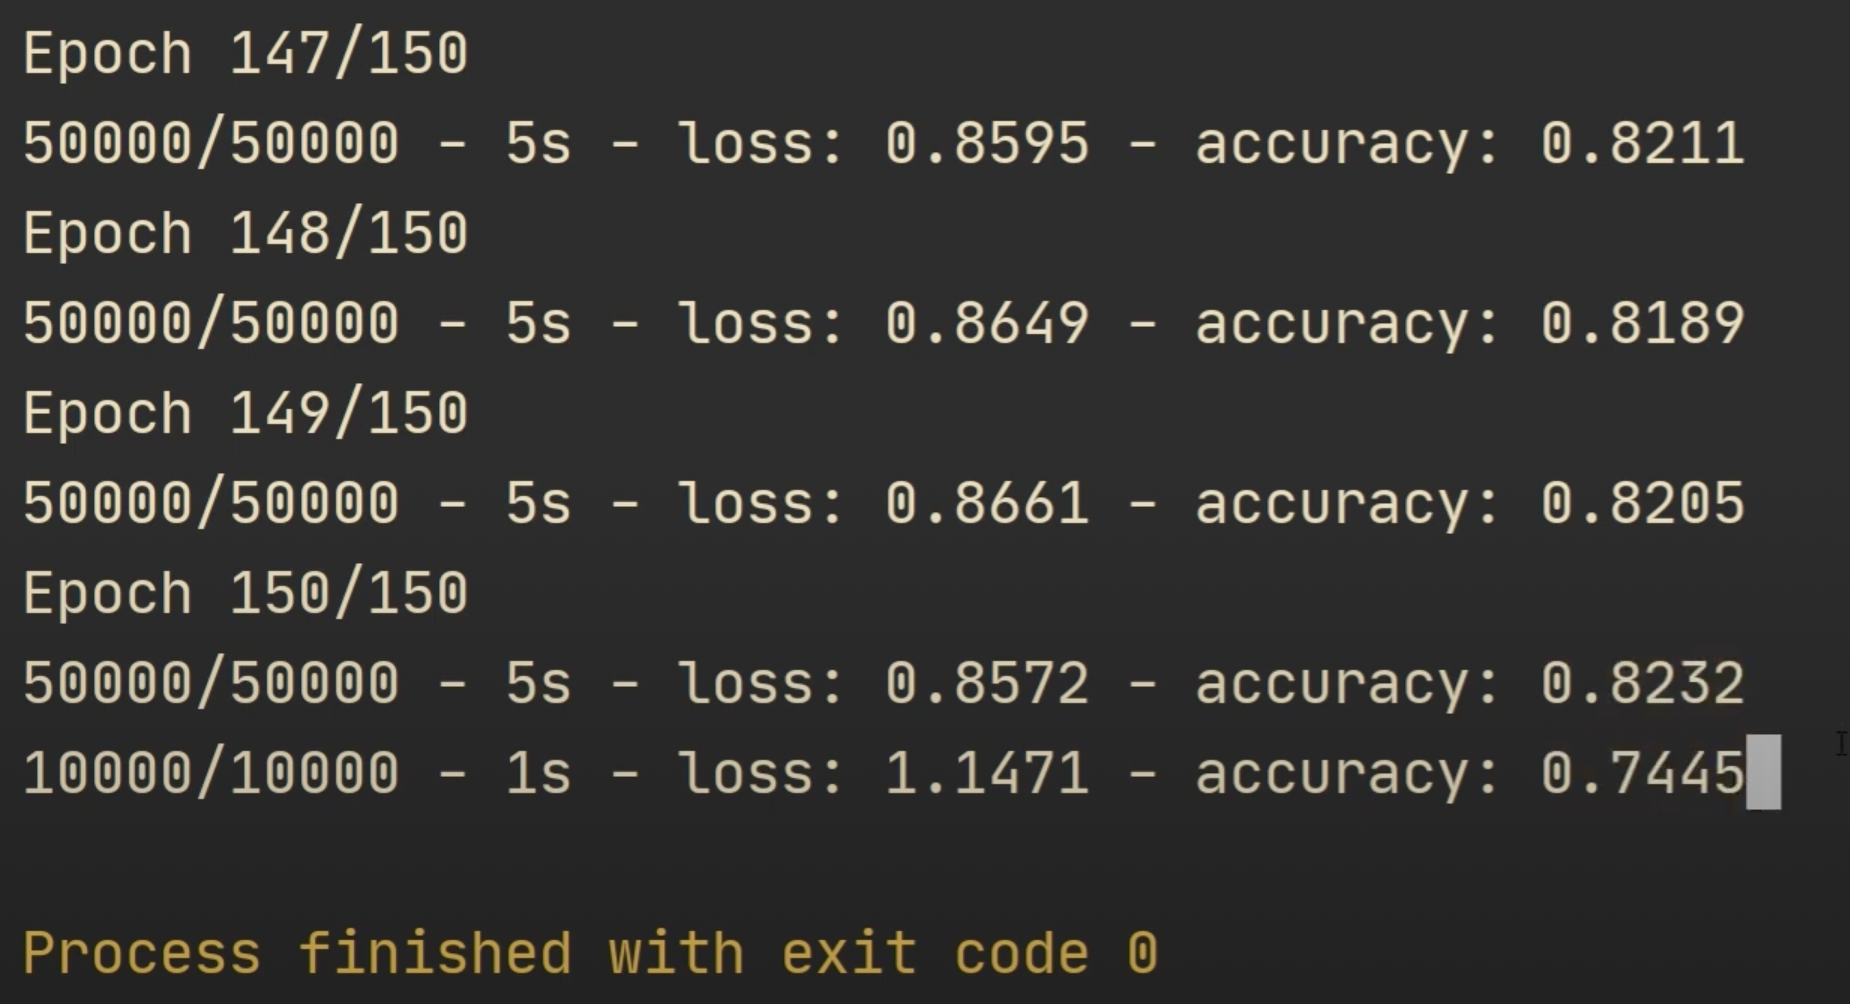
</div>